In [1]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [4]:
torch.manual_seed(42)

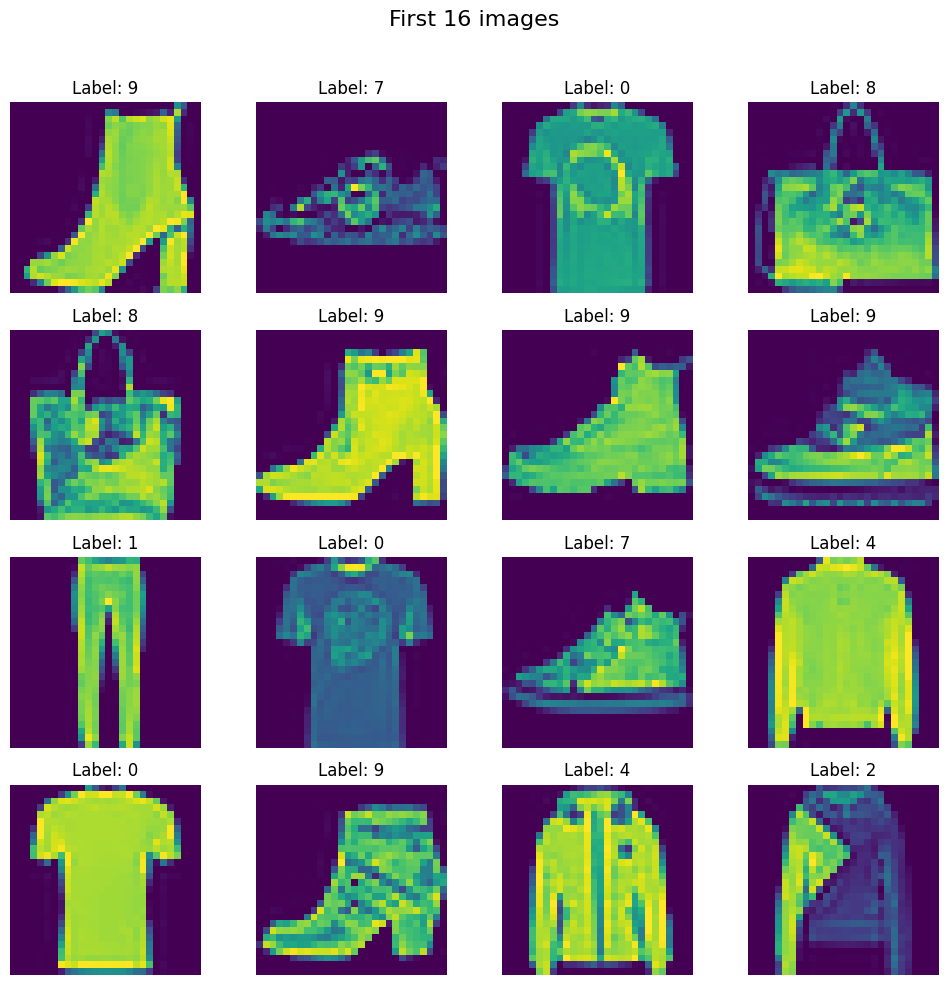

In [ ]:
# Create a 4X4 grid of images
fig, axes = plt.subplots(4, 4, figsize = (10, 10))
fig.suptitle("First 16 images", fontsize=16)

# Plot the first 16 images from dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28) # Reshape to 28 X 28
    ax.imshow(img)  # Display in greyscale
    ax.axis("OFF")  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}") # SHow the Label

plt.show()

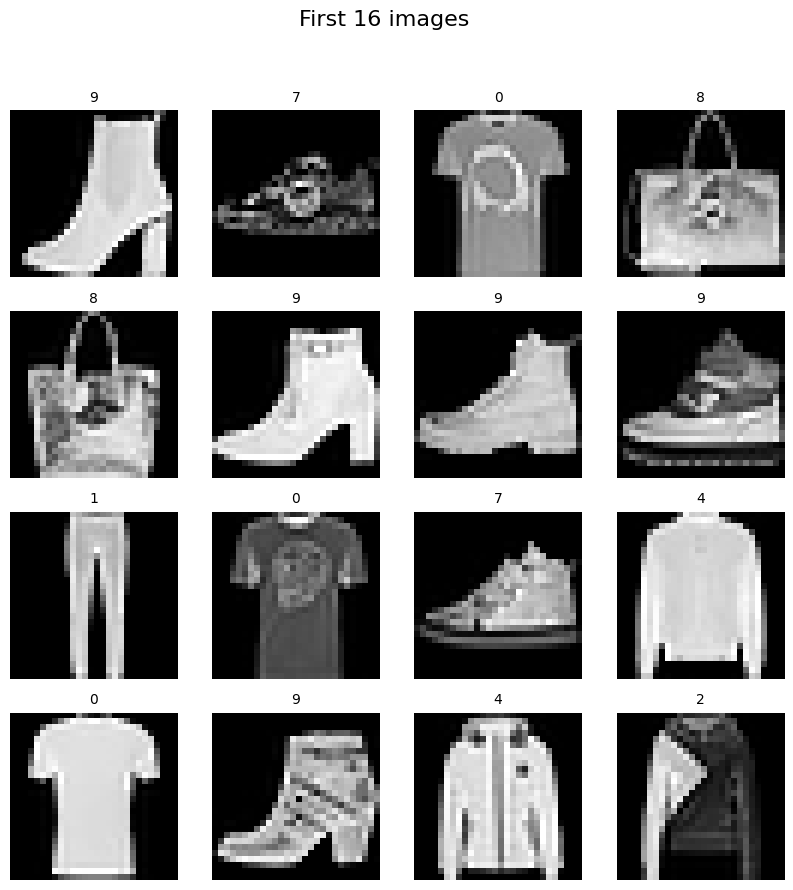

In [14]:
# 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images", fontsize=16)

for i in range(16):
    ax = axes[i // 4, i % 4]           # pick subplot
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(df.iloc[i, 0], fontsize=10)

plt.show()

In [15]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 1:].values, df.iloc[:, 0].values, test_size=0.2, random_state=42)

In [22]:
# Scaling the features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
# Create CustomDataset cLass
class CustomDataset(Dataset):
    def __init__(self, feature, label):
        self.feature = torch.tensor(feature, dtype=torch.float32)
        self.label = torch.tensor(label, dtype=torch.long)

    def __len__(self):
        return len(self.feature)
    
    def __getitem__(self, index):
        return self.feature[index], self.label[index]


In [24]:
# Create Train Dataset object
train_dataset = CustomDataset(X_train, Y_train)


In [25]:
len(train_dataset)

4800

In [28]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [26]:
# Create Test Dataset Object
test_dataset = CustomDataset(X_test, Y_test)

In [27]:
len(test_dataset)

1200

In [29]:
# Create Train and Test Loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [31]:
# Define NN Class

class MySimpleNN(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
            

        )

    def forward(self, out):
        return self.network(out)

In [34]:
# Set Learning Rate and epoch
learning_rate = 0.1
epochs = 100

In [35]:
# Instatiate the model
model = MySimpleNN(X_train.shape[1])

# loss function
loss_function = nn.CrossEntropyLoss()

# Optimization Function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [36]:
# training loop

for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_feature, batch_label in train_loader:
        # forward pass
        y_pred = model(batch_feature)

        #loss calculate
        loss = loss_function(y_pred, batch_label)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item() 
    
    avg_loss = total_epoch_loss / len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss}")


Epoch: 1, Loss: 1.3513192009925843
Epoch: 2, Loss: 0.8018482408920924
Epoch: 3, Loss: 0.6689845567941666
Epoch: 4, Loss: 0.5903442211945852
Epoch: 5, Loss: 0.5410628966490427
Epoch: 6, Loss: 0.5036374683181445
Epoch: 7, Loss: 0.47584273437658947
Epoch: 8, Loss: 0.4656693103909493
Epoch: 9, Loss: 0.4376130285859108
Epoch: 10, Loss: 0.41103279893596967
Epoch: 11, Loss: 0.39453019430239994
Epoch: 12, Loss: 0.37217881639798484
Epoch: 13, Loss: 0.3599522441625595
Epoch: 14, Loss: 0.3453839446604252
Epoch: 15, Loss: 0.3355404201149941
Epoch: 16, Loss: 0.30521651963392893
Epoch: 17, Loss: 0.3041785567998886
Epoch: 18, Loss: 0.2969388566911221
Epoch: 19, Loss: 0.2809762563804785
Epoch: 20, Loss: 0.27607513420283797
Epoch: 21, Loss: 0.2672704497973124
Epoch: 22, Loss: 0.25856588867803415
Epoch: 23, Loss: 0.2439957239230474
Epoch: 24, Loss: 0.2531326782206694
Epoch: 25, Loss: 0.23864224587877592
Epoch: 26, Loss: 0.21804788378377757
Epoch: 27, Loss: 0.2210249113291502
Epoch: 28, Loss: 0.208940214

In [37]:
model.eval()

MySimpleNN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [38]:
# Evaluation COde
total = 0
correct = 0

with torch.no_grad():
    for batch_feature, batch_label in test_loader:
        output = model(batch_feature)
        _, prediction = torch.max(output, 1)
        total = total + batch_label.shape[0]
        correct = correct + (prediction == batch_label).sum().item()

print(correct/total)


0.8233333333333334
